### 1. 웹페이지 다운로드

In [2]:
import urllib

def download(url):
    html = urllib.request.urlopen(url).read()
    return html

In [3]:
download('https://www.google.com')

b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world\'s information, including webpages, images, videos and more. Google has many special features to help you find exactly what you\'re looking for." name="description"><meta content="noodp" name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="ybyI55IuBSB+UFuSLD8P4g==">(function(){window.google={kEI:\'FlmUYbfEC5XYkgX61J6YCA\',kEXPI:\'0,18168,184204,1100164,56873,6059,206,4804,2316,383,246,5,1354,4936,314,1122516,1197752,329515,51224,16114,17444,11240,17572,4859,1361,9290,3028,2817,1930,12834,4020,978,13228,3847,4192,6430,1142,20680,919,5081,1593,1279,2212,530,149,1103,840,1983,4314,109,3405,606,2023,1777,520,1704,12966,3229,2843,7,5599,6755,5096,7539,4085,2772,1926,906,2,941,2614,12710,432,3,1590,1,5445,148,11325,98

In [6]:
# BeautifulSoup, Request 사용하자

In [7]:
import requests
url = 'http://www.google.com'
response = requests.get(url)
response

<Response [200]>

In [8]:
#HTML 반환하는 함수
def download2(url):
    response = requests.get(url)
    html = response.text    #text는 HTML을 반환
    return html

In [9]:
download2('https://www.google.com')

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world\'s information, including webpages, images, videos and more. Google has many special features to help you find exactly what you\'re looking for." name="description"><meta content="noodp" name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="Xq8L0MkPVHFxM92sITbHKQ==">(function(){window.google={kEI:\'7FmUYZvxC5DukgX_5b2QCg\',kEXPI:\'0,1302536,56873,6058,207,4804,2316,383,246,5,1354,4936,314,1122516,1197705,689,328873,51223,16115,28684,17572,4859,1361,283,9007,3027,17582,4020,978,13228,3847,4192,6430,1142,20680,920,5080,885,708,1279,2212,530,149,1103,840,1983,3,4311,3514,606,2023,1777,520,1704,12966,3227,2845,7,5599,6755,5096,14396,1924,908,2,941,2614,3784,8926,432,3,346,1244,1,5445,148,11323,2652,4,1253,275,2304,703

- BeautifulSoup를 사용하여 tag에 쉽게 접근할 수 있다.

In [10]:
from bs4 import BeautifulSoup
html = requests.get('http://www.google.com')
soup = BeautifulSoup(html.text, 'html.parser')

In [11]:
soup.html.body

<body bgcolor="#fff"><script nonce="IHbwQsDXD2p7BiA4Va162Q==">(function(){var src='/images/nav_logo229.png';var iesg=false;document.body.onload = function(){window.n && window.n();if (document.images){new Image().src=src;}
if (!iesg){document.f&&document.f.q.focus();document.gbqf&&document.gbqf.q.focus();}
}
})();</script><div id="mngb"><div id="gbar"><nobr><b class="gb1">Search</b> <a class="gb1" href="http://www.google.com/imghp?hl=en&amp;tab=wi">Images</a> <a class="gb1" href="http://maps.google.com/maps?hl=en&amp;tab=wl">Maps</a> <a class="gb1" href="https://play.google.com/?hl=en&amp;tab=w8">Play</a> <a class="gb1" href="http://www.youtube.com/?gl=US&amp;tab=w1">YouTube</a> <a class="gb1" href="https://news.google.com/?tab=wn">News</a> <a class="gb1" href="https://mail.google.com/mail/?tab=wm">Gmail</a> <a class="gb1" href="https://drive.google.com/?tab=wo">Drive</a> <a class="gb1" href="https://www.google.com/intl/en/about/products?tab=wh" style="text-decoration:none"><u>More</u>

### 실습 - 네이버 환율 정보 크롤링

- 국가, 환율정보를 가져와서 pandas의 시리즈로 만들기

In [12]:
html = requests.get('https://m.stock.naver.com/marketindex/index.nhn')
soup = BeautifulSoup(html.text, 'html.parser')

In [22]:
country = []
stock_items = soup.findAll('span', {'class' : 'stock_item'})
for item in stock_items:
    country.append(item.text)
country.remove('달러인덱스')

country

['남아프리카 ZAR',
 '노르웨이 NOK',
 '뉴질랜드 NZD',
 '대만 TWD',
 '덴마크 DKK',
 '러시아 RUB',
 '말레이시아 MYR',
 '멕시코 MXN',
 '몽골 MNT',
 '미국 USD',
 '바레인 BHD',
 '방글라데시 BDT',
 '베트남 VND',
 '브라질 BRL',
 '브루나이 BND',
 '사우디 SAR',
 '스웨덴 SEK',
 '스위스 CHF',
 '싱가포르 SGD',
 '아랍에미리트 AED',
 '영국 GBP',
 '오만 OMR',
 '요르단 JOD',
 '유럽 EUR',
 '이스라엘 ILS',
 '이집트 EGP',
 '인도 INR',
 '인도네시아 IDR',
 '일본 JPY',
 '중국 CNY',
 '체코 CZK',
 '칠레 CLP',
 '카자흐스탄 KZT',
 '카타르 QAR',
 '캐나다 CAD',
 '쿠웨이트 KWD',
 '태국 THB',
 '터키 TRY',
 '파키스탄 PKR',
 '폴란드 PLN',
 '필리핀 PHP',
 '헝가리 HUF',
 '호주 AUD',
 '홍콩 HKD']

In [24]:
price = []
stock_price = soup.findAll('span', {'class' : 'stock_price'})
for prices in stock_price:
    price.append(prices.text)
    
price

['1,181.80',
 '1,338.39',
 '1,029.85',
 '185.03',
 '1,853.60',
 '80.76',
 '95.91',
 '76.24',
 '135.09',
 '826.85',
 '42.49',
 '179.96',
 '16.17',
 '283.24',
 '56.90',
 '0.41',
 '1,181.80',
 '3,134.33',
 '13.78',
 '5.22',
 '214.74',
 '871.05',
 '315.08',
 '132.80',
 '1,270.55',
 '871.05',
 '321.75',
 '1,587.57',
 '3,069.69',
 '1,666.85',
 '1,338.39',
 '382.19',
 '75.23',
 '15.87',
 '8.33',
 '1,029.85',
 '185.03',
 '52.98',
 '1.45',
 '2.74',
 '324.58',
 '941.04',
 '3,908.33',
 '36.09',
 '113.87',
 '6.77',
 '287.57',
 '23.46',
 '3.67',
 '861.47',
 '151.76']

In [25]:
len(country), len(price)

(44, 51)

In [26]:
import pandas as pd

data = {}
for i in range(len(country)):
    data[country[i]] = price[i+7]
    
pd.Series(data)

남아프리카 ZAR        76.24
노르웨이 NOK        135.09
뉴질랜드 NZD        826.85
대만 TWD           42.49
덴마크 DKK         179.96
러시아 RUB          16.17
말레이시아 MYR       283.24
멕시코 MXN          56.90
몽골 MNT            0.41
미국 USD        1,181.80
바레인 BHD       3,134.33
방글라데시 BDT        13.78
베트남 VND           5.22
브라질 BRL         214.74
브루나이 BND        871.05
사우디 SAR         315.08
스웨덴 SEK         132.80
스위스 CHF       1,270.55
싱가포르 SGD        871.05
아랍에미리트 AED      321.75
영국 GBP        1,587.57
오만 OMR        3,069.69
요르단 JOD       1,666.85
유럽 EUR        1,338.39
이스라엘 ILS        382.19
이집트 EGP          75.23
인도 INR           15.87
인도네시아 IDR         8.33
일본 JPY        1,029.85
중국 CNY          185.03
체코 CZK           52.98
칠레 CLP            1.45
카자흐스탄 KZT         2.74
카타르 QAR         324.58
캐나다 CAD         941.04
쿠웨이트 KWD      3,908.33
태국 THB           36.09
터키 TRY          113.87
파키스탄 PKR          6.77
폴란드 PLN         287.57
필리핀 PHP          23.46
헝가리 HUF           3.67
호주 AUD          861.47
홍콩 HKD     

### 크롤링을 이용하여 로그인하기

In [27]:
#세션 생성
session = requests.session()

#로그인
log_info = {'id' : 'jjun8177', 'pw' : '@@yoon8177'}
url = 'https://nid.naver.com/nidlogin.login'
response = session.post(url, data=log_info)

#마이페이지 접근
url_mypage = 'https://nid.naver.com/user2/help/myInfo.nhn?lang=ko_KR'
response = session.get(url_mypage)

#Soup 객체 생성
soup = BeautifulSoup(response.text, 'html.parser')

#마이페이지에 별명 가져오기
soup.find('span')

<span class="menu_text"><span class="text">ID 로그인</span></span>

- 로그인이 이렇게 쉽게 크롤링으로 될 리가 없다!

### 크롤링을 이용하여 브라우저 제어를 통한 크롤링

In [28]:
pip install selenium

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [30]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [26.8 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease              
Get:4 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [666 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:6 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,430 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,442 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]    
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [2,867 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates/restricted amd64 Packages [699 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2,222 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/multiverse am

In [31]:
!apt install chromium-chromedriver -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
  libfile-basedir-perl libfile-desktopentry-perl libfile-mimeinfo-perl
  libipc-system-simple-perl libnet-dbus-perl libtie-ixhash-perl
  libx11-protocol-perl libxml-parser-perl libxml-twig-perl
  libxml-xpathengine-perl xdg-utils
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension libunicode-map8-perl
  libunicode-string-perl xml-twig-tools
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra libfile-basedir-perl libfile-desktopentry-perl
  libfile-mimeinfo-perl libipc-system-simple-perl libnet-dbus-perl
  libtie-ixhash-perl libx11-protocol-perl libxml-parser-perl libxml-twig-perl
  libxml-xpathengine-perl xdg-utils
0 upgraded, 15 newly installed, 0 to remove 

In [32]:
crawling_urls = {"산과공원": "https://data.seoul.go.kr/dataList/OA-12962/S/1/datasetView.do",}

In [33]:
import requests
from selenium import webdriver
import time
import pandas as pd
import os
import os.path
import glob

#### 셀레니움의 find_element_by_css_selector()를 이용하여 버튼의 css selector를 이용하여 csv다운로드 버튼의 위치를 알아낼 수 있다.

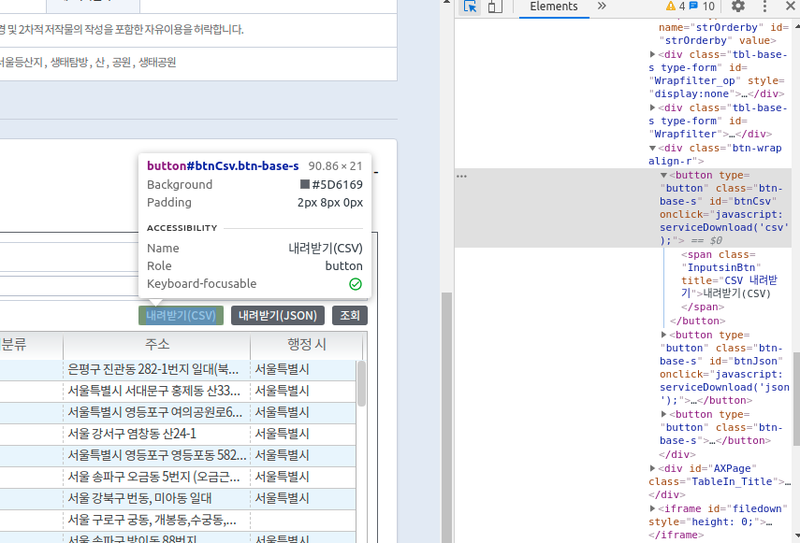

In [34]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=chrome_options)

#웹 드라이버 실행 및 페이지 이동
driver.get(crawling_urls['산과공원'])
time.sleep(5)

#csv 파일 다운로드 버튼 클릭하기
driver.find_element_by_css_selector('#btnCsv').click()
time.sleep(3)

driver.quit()

In [36]:
# 다운로드 받은 csv파일 확인
_dir = os.getenv('HOME')

files = glob.glob('{}/서울시*.csv'.format(_dir))
print(files)

['/aiffel/서울시 산과공원 생태관광 정보 (한국어).csv']


In [37]:
# csv파일 dataframe으로 변환
f_M_park = pd.read_csv(files[0], encoding='CP949')
f_M_park.head(3)

,키,명칭,대분류,주소,행정 시,행정 구,행정 동,대표전화,면적,지정일,교?안내
0,BE_IW14-0020,진관내동 생태경관보전지역,생태탐방,은평구 진관동 282-1번지 일대(북한산국립공원 북한산성 입구 주변 습지 ),서울특별시,은평구,진관동,02-2115-7550~5 02-350-1397,16639㎡,2002년 12월 30일,지하철 3호선 구파발역 1번 출구에서 704번 34번 버스를 타고 북한산성 입구에서...
1,BE_IW14-0109,안산공원,산과공원,서울특별시 서대문구 홍제동 산33번지 일대,서울특별시,서대문구,홍제1동,02-330-1395,NaN,NaN,NaN
2,BE_IW14-0110,여의도공원,산과공원,서울특별시 영등포구 여의공원로68(여의도동 2번지),서울특별시,영등포구,여의동,02-761-4079,NaN,NaN,NaN
